<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360"/>

### Machine Learning Intermediate Project - Shikha Gupta,PhD

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br/>
    - 2.1 [Importing packages](#section201)<br/>
    - 2.2 [Reading the csv](#section202)<br/>
3. [Data Profiling](#section3)
    - 3.1 [Pre Profiling](#section301)<br/>
    - 3.3 [Initial Observations](#section302)<br/>
4. [Exploratory Data Analysis](#section4)</br>
    - 4.1 [Distribution of Age](#section401)<br/>
    - 4.2 [BoxPlot for Age to look at outliers](#section402)<br/>
    - 4.3 [Analysis of Gender Distribution](#section403)<br/>
    - 4.4 [Understanding Class Distribution](#section404)<br/>
    - 4.5 [Analysing different classes across different gender and Age](#section405)<br/>
5. [Processing Data for Building Models](#section5) <br/>
    - 5.1 [Segmenting data based on Age](#section501)<br/>
    - 5.2 [Segmenting data into X and y](#section502)<br/>
    - 5.3 [Splitting data into train and test](#section503)<br/>
    - 5.4 [Encoding categorical columns](#section504)<br/>
        - 5.4.1 [Encoding train data](#section50401)<br/>
        - 5.4.2 [Encoding test data](#section50402)<br/>
        - 5.4.3 [Equalizing features in train and test data](#section50403)<br/>
6. [Checking for Multicolinearity](#section6)<br/>
7. [Post Processing EDA using Sweetviz](#section7)<br/>
8. [Building Machine learning Models](#section8)<br/>
   - 8.1 [Running Base Models](#section801)<br/>
   - 8.2 [Evaluating and improving Dcision Tree](#section802)<br/>
        - 8.2.1 [Visualizing Decision Tree](#section80201)<br/>
        - 8.2.2 [Cross Validation for Decision Tree](#section80202)<br/>
        - 8.2.3 [Hypertuning Decision Tree using Random Search](#section80203)<br/>
        - 8.2.4 [Hypertuning using GridSearch](#section80204)<br/>
        - 8.2.5 [Feature Selection based on the best DT model](#section80205)<br/>
        - 8.2.6 [Using SFM transform to create new dataset for DT](#section80206)<br/>
        - 8.2.7 [Running tuned DT on selected features](#section80207)<br/>
   - 8.3 [Evaluating and improving Random Forest](#section803)<br/>
        - 8.3.1 [Using RepeatedStratifiedKfold method for cross validation for Random Forest](#section80301)<br/>
        - 8.3.2 [Using Random Search for hypertuning Random Forest](#section80302)<br/>
        - 8.3.3 [Hypertuning Random Forest with Grid Search](#section80303)<br/>
        - 8.3.4 [Feature Selection based on best Random Forest Model](#section80304)<br/>
        - 8.3.5 [Using SFM to create new dataset with important features based on the best Random Forest Model](#section80305)<br/>
        - 8.3.6 [Running tuned RF on selected features ](#section80306)<br/>
        - 8.3.7 [Tuning RF model for selected features ](#section80307)<br/>
   - 8.4 [Adding important features from the best DT and RF models](#section804)<br/>
        - 8.4.1 [Running Base Models on new dataset containing selected features from the best DT and RF models](#section80401)<br/>
        - 8.4.2 [Refining Logistic Regression with Grid Search for new dataset wth selected features from the best DT and RF models](#section80402)<br/>
        - 8.4.3 [Refinining Decision Tree with Random Search using the new dataset with selected features from the best DT and RF models](#section80403)<br/> 
        - 8.4.4 [Refinining Decision Tree with Grid Search using the new dataset with selected features from the best DT and RF models](#section80404)<br/>
        - 8.4.5 [Hypertuning Random Forest with Random Search using the new dataset with selected features from the best DT and RF models](#section80405)<br/>
        - 8.4.6 [Hypertuning Random Forest with Grid Search using the new dataset with selected features from the best DT and RF models](#section80406)<br/>
9. [Summary of Results](#section9)<br/>  
10. [Conclusions](#section10)<br/>  

<a id=section1></a>
## 1. Problem Statement

This notebook explores diabetes dataset and will use __Pandas__ to perform  __Exploratory Data Analysis(EDA)__. Followed by EDA, various __ML models__ will be applied to predict the occurence of disease in the patients.


<a id=section2></a>
## 2. Data Loading and Description

### 2.1 Importing packages <a id=section201></a>

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import lux
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output
from sklearn import metrics
import pandas.util.testing as tm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)

### 2.2 Reading the csv <br id=section202></br>

In [3]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/shikha55/ML-Intermediate-Project--Diabetes/main/diabetes_data_upload.csv")

In [4]:
diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
diabetes.shape

(520, 17)

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

## 3. Data Profiling <br id=section3 ></br>

### 3.1 Pre Profiling <br id=section301></br>

In [7]:
#profile = pandas_profiling.ProfileReport(diabetes)
#profile.to_file("diabetes_before_preprocessing.html")

### 3.2 Initial Observations (based on Pandas Profiling) <br id=section302></br>
1. There are 520 observations across 17 variables in this data set - 2 categorical, 14 Boolean and 1 Numerical
2. There are no missing values in the data set.
3. There are 51.7% duplicate rows.

In [8]:
diabetes.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Exploratory Data Analysis  <br id=section4 ></br>

### 4.1 Distribution of Age <br id=section401></br>

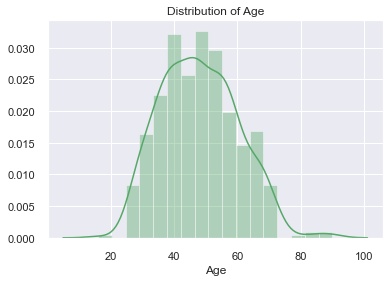

In [9]:
# Using distribution plot to understand the distriution of age
sns.distplot(diabetes['Age'], color ='g')
plt.title('Distribution of Age')
plt.show()

Conclusion: Age has normal distribution but there seems to be a few outliers. Will try to identify those in a box plot

### 4.2 BoxPlot for Age to look at outliers <br id=section402></br>

<AxesSubplot:ylabel='Age'>

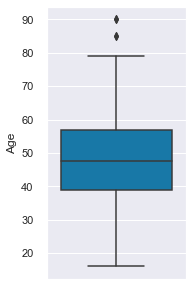

In [10]:
# Outlier analysis in Age using Box Plot
plt.figure(figsize=(2.5, 5))
sns.boxplot(data=diabetes, y ='Age', palette='winter')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

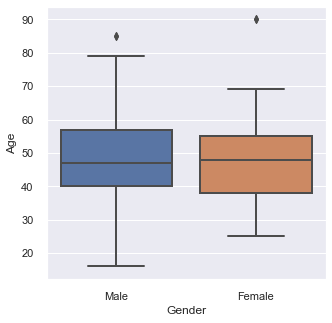

In [11]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Gender", y="Age", data=diabetes,linewidth=2.0)

Conclusion: Age has two outliers with age >80 years

### 4.3 Analysis of Gender Distribution <br id=section403 ></br>

In [12]:
#Understanding distribution of gender
print(diabetes['Gender'].value_counts())

Male      328
Female    192
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Gender Distribution')

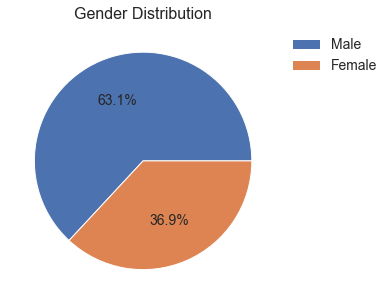

In [13]:
#Plotting distribution of Gender
ax=diabetes['Gender'].value_counts().plot(kind='pie',autopct='%3.1f%%',figsize=(5,5), fontsize="14", label="", labeldistance=None)
ax.legend (fontsize=14,
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title(('Gender Distribution'),size=16)
                                             #wedgeprops=dict(width=0.15), autopct='%3.1f%%', 
                                                                  #figsize=(13, 12), fontsize=11, 
                                                                 #startangle=20, shadow=True, cmap='inferno')

Conclusion: There is a slight imbalance in the Gender distribution with 60% patients being Male and 40% patients being female

### 4.4 Understanding Class Distribution <br id=section404 ></br>

Text(0.5, 1.0, 'Class Distribution')

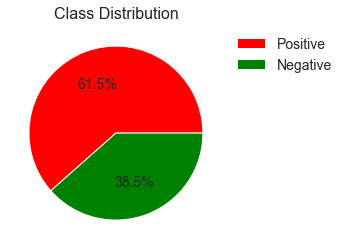

In [14]:
colors=["red", "green"]
ax=diabetes['class'].value_counts().plot(kind='pie',autopct='%3.1f%%',figsize=(4,4), fontsize="14", label="", labeldistance=None,colors= colors)
ax.legend (fontsize=14,
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title(('Class Distribution'),size=16)

Conclusion: Just like Gender, there is a slight impbalance in class as well. 

### 4.5  Analysing different classes across different gender and Age <br id=section405 ></br>

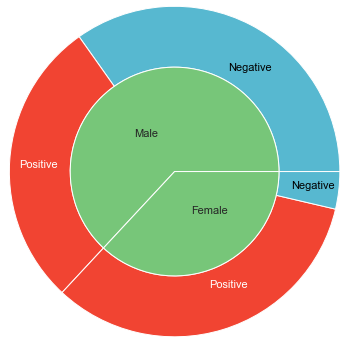

In [15]:
# Plotting distribution of class acrosss different Gender
subgroup_names=['Male', 'Female']
subgroup_size=[328,192]
group_names=['Negative','Positive','Positive','Negative']
colorlist = ['black','w','w','black']  
group_size=[181,147,173,19]
a, b, c =[plt.cm.Reds,plt.cm.GnBu, plt.cm.YlGn]


fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size,radius=1.9,colors=[b(0.6), a(0.6), a(0.6),b(0.6)])
plt.setp(mypie, width=0.7, edgecolor='white')
wedges,texts = plt.pie(group_size,labels=group_names, labeldistance= 1.35)
for text, color in zip(texts, colorlist):
    text.set_color(color)
    
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.2, labels=subgroup_names, labeldistance=0.4, colors=[c(0.5), c(0.5)]) #autopct='%3.1f%%')

#,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
#plt.margins(0,0)
#plt.rcParams['text.color'] = 'black'

# show it
plt.show()


In [16]:
#Looking at distribution of class across Male and Female patients
diabetes.groupby(['Gender','class'])['Gender'].count()

Gender  class   
Female  Negative     19
        Positive    173
Male    Negative    181
        Positive    147
Name: Gender, dtype: int64

<AxesSubplot:>

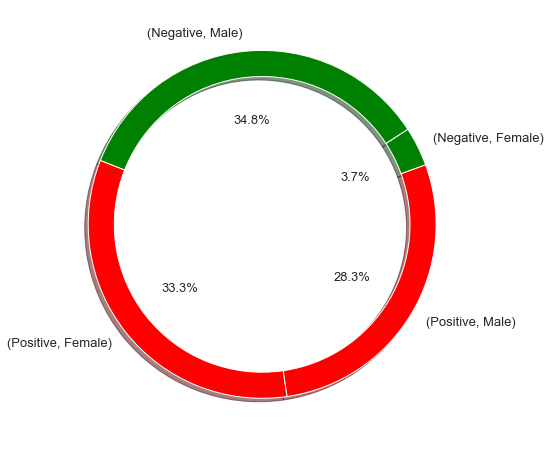

In [17]:
#Plotting donut chart with percentage of difference classes across difference gender

diabetes.groupby(['class','Gender'])['Age'].count().plot(kind='pie',wedgeprops=dict(width=0.15),autopct='%3.1f%%', 
                                                                  figsize=(10, 8), fontsize=13, startangle=20, 
                                                                  label="",shadow=True, colors=['green','green','red','red'])
                                                                 

Conclusion: 90% of female patients are disease positive , which constitutes 33% of total number of patients whereas 44% of male patients are disease positive, which constitutes 28% of total patient population. 

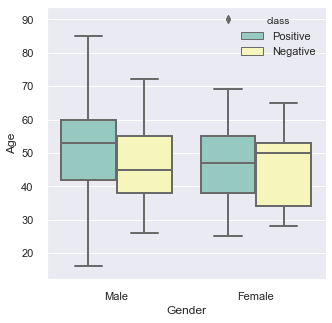

In [18]:
# Plotting box plots to understand distriburtion of Age across difference classes in Male and Female patients
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x="Gender", y="Age", hue='class', data=diabetes, palette='Set3',linewidth=2.0)

In [19]:
diabetes.groupby(['Age','Gender'])['class'].value_counts()

Age  Gender  class   
16   Male    Positive     1
25   Female  Positive     1
     Male    Positive     1
26   Male    Negative     1
27   Male    Negative     6
28   Female  Positive     5
             Negative     1
     Male    Negative     3
29   Male    Negative     1
30   Female  Positive     6
     Male    Negative    18
             Positive     1
31   Female  Positive     2
     Male    Positive     1
32   Female  Negative     1
     Male    Positive     3
             Negative     1
33   Female  Negative     2
     Male    Positive     2
34   Female  Negative     2
             Positive     1
     Male    Negative     3
35   Female  Positive    21
     Male    Positive     6
             Negative     3
36   Female  Positive     2
             Negative     1
     Male    Negative     4
             Positive     1
37   Male    Negative     4
             Positive     3
38   Female  Positive     7
     Male    Negative     7
             Positive     6
39   Female  Positive    1

Conclusions: 
1. Median age for positive class in Males is ~55 years and for negative class is 45 years.  Median age for disease positive and negative Female patients is close to ~50 years.
2. There is a high variability in the age of disease positive Male patients. The age of disease positive Male patients varies from 16 to 85 years.
3. There is one outlier in disease positive Female patient population with 90 years of age.

# 5. Processing data for Building Models <br id=section5 ></br>

In [20]:
df=diabetes.copy()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [22]:
df.tail(20)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
500,66,Male,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive
501,67,Male,No,No,No,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Negative
502,70,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
503,44,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
504,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
505,35,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
506,61,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
507,60,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Negative
508,58,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,No,Negative
509,54,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


### 5.1  Segmenting data based on Age  <br id=section501 ></br>

In [23]:
df['Age_Group'] = pd.cut(df['Age'],
                         [0,17,30,40,50,60,99],
                         labels=['0-17','18-30','31-40','41-50','51-60','>60'],include_lowest=True)

In [24]:
df.drop(['Age'],axis=1, inplace=True)

### 5.2  Segmenting data into X and y  <br id=section502 ></br>

In [25]:
# Defining X and Y 
X = df.loc[:,df.columns != 'class']
X

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Age_Group
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,31-40
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,51-60
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,41-50
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,41-50
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,31-40
516,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,41-50
517,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,51-60
518,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,31-40


In [26]:
y = df.loc[:,df.columns == 'class']  # y = df.class is giving syntax error most likely since class is a keyword in python

### 5.3 Splitting data into train and test <br id=section503 ></br>

In [27]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4, stratify = y)

In [28]:
print(X_train.shape)
print(y_train.shape)

(416, 16)
(416, 1)


In [29]:
grouped=X_train.groupby(["Age_Group"])["Age_Group"]
grouped.count()

Age_Group
0-17       1
18-30     40
31-40    102
41-50    112
51-60    101
>60       60
Name: Age_Group, dtype: int64

In [30]:
grouped=X_test.groupby(["Age_Group"])["Age_Group"]
grouped.count()

Age_Group
0-17      0
18-30     4
31-40    21
41-50    33
51-60    26
>60      20
Name: Age_Group, dtype: int64

### 5.4 Encoding categorical columns  <br id=section504 ></br>

### 5.4.1 Encoding train data  <br id=section50401 ></br>

In [31]:
cols= X_train.columns
num_cols = X_train._get_numeric_data().columns
len(num_cols)

0

In [32]:
cat_cols = X_train.columns

In [33]:
len(cat_cols)

16

In [34]:
# Using Label encoder to convert non-numerical labels to numerical labels. 
# Label encoder is used because all categorical columns are Binary

from sklearn.preprocessing import LabelEncoder  
number = LabelEncoder()
# transform data
for i in cat_cols:
    X_train [i] = number.fit_transform(X_train[i].astype('str'))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
X_train.shape

(416, 16)

In [36]:
# Using dummy enocding for Age_Group since there are 6 nominal categories
X_train= pd.get_dummies(X_train, columns = ['Age_Group'])

In [37]:
X_train.shape

(416, 21)

### 5.4.2 Encoding test data  <br id=section50402 ></br>

In [38]:
X_test.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Age_Group
446,Female,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,No,41-50
337,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,51-60
54,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,51-60
110,Female,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,51-60
279,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,41-50


In [39]:
for i in cat_cols:
    X_test [i] = number.fit_transform(X_test[i].astype('str'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
X_test.shape

(104, 16)

In [41]:
X_test= pd.get_dummies(X_test, columns = ['Age_Group'])

In [42]:
X_test.shape

(104, 20)

In [43]:
y_test ['class'] = number.fit_transform(y_test ['class'].astype('str'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
y_train ['class'] = number.fit_transform(y_train ['class'].astype('str'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 5.4.3 Equalizing features in train and test data  <br id=section50403 ></br>

In [45]:
X_train.shape

(416, 21)

In [46]:
X_test.shape

(104, 20)

In [47]:
# To equalize features , dropping age_geoup 0-17 in X_train which only havs one observation , which is an outlier based on Age

X_train.drop("Age_Group_0",axis=1,inplace=True)

In [48]:
X_train.shape

(416, 20)

## 6. Checking for multicolinearity <br id=section6 ></br>

In [49]:
df2=df.copy()

In [50]:
cols =df2.columns
num_cols = df2._get_numeric_data().columns
cat_cols2= list(set(cols) - set(num_cols))

In [51]:
from sklearn.preprocessing import LabelEncoder   
number=LabelEncoder()
for i in cat_cols2:
    df2 [i] = number.fit_transform(df2[i].astype('str'))

In [52]:
df2= pd.get_dummies(df2, columns = ['Age_Group'])

In [53]:
df2

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age_Group_0,Age_Group_1,Age_Group_2,Age_Group_3,Age_Group_4,Age_Group_5
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,1,0,0,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0
516,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0
517,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,0,0,0,0,1,0
518,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0


Text(0.5, 1.0, 'Correlation between features')

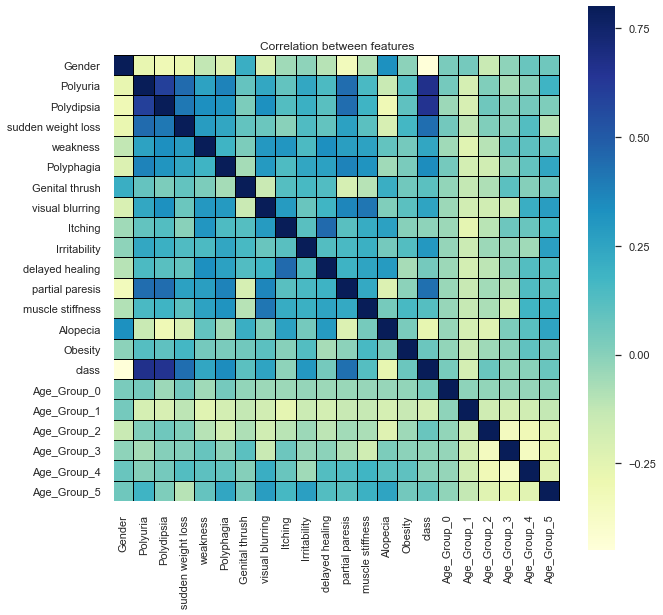

In [54]:
corr = df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8, linewidth=.01, square = True, annot = False,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [55]:
corr_matrix=df2.corr().abs()
corr_matrix['class'].sort_values(ascending=False)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
Gender                0.449233
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
Alopecia              0.267512
visual blurring       0.251300
weakness              0.243275
Age_Group_1           0.185733
muscle stiffness      0.122474
Genital thrush        0.110288
Age_Group_2           0.077276
Age_Group_5           0.074162
Obesity               0.072173
delayed healing       0.046980
Age_Group_0           0.034702
Age_Group_3           0.019664
Itching               0.013384
Age_Group_4           0.001415
Name: class, dtype: float64

In [56]:
corr_matrix1 = df2.corr().abs()

In [57]:
corr_matrix1

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age_Group_0,Age_Group_1,Age_Group_2,Age_Group_3,Age_Group_4,Age_Group_5
Gender,1.000000,0.268894,0.312262,0.281840,0.124490,0.219968,0.208961,0.208092,0.052496,0.013735,0.101978,0.332288,0.090542,0.327871,0.005396,0.449233,0.033584,0.046479,0.146138,0.012988,0.073202,0.061169
Polyuria,0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,0.144192,0.126567,0.665922,0.044234,0.191143,0.017858,0.059545,0.008849,0.184506
Polydipsia,0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,0.310964,0.098691,0.648734,0.039551,0.204468,0.062667,0.008872,0.045853,0.023085
sudden weight loss,0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,0.004516,0.140340,0.088140,0.264014,0.109756,0.202727,0.169294,0.436568,0.051869,0.117168,0.015336,0.012961,0.127099,0.101437
weakness,0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275,0.052281,0.235837,0.102409,0.077956,0.104616,0.087420
Polyphagia,0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,0.053498,0.029785,0.342504,0.047966,0.181111,0.173182,0.009356,0.090929,0.241206
Genital thrush,0.208961,0.087273,0.028081,0.089858,0.027780,0.063712,1.000000,0.148408,0.125336,0.160551,0.136111,0.195612,0.100188,0.204847,0.053828,0.110288,0.023521,0.129719,0.080857,0.109746,0.007196,0.053182
visual blurring,0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300,0.039551,0.176679,0.173931,0.146351,0.207869,0.280317
Itching,0.052496,0.088289,0.128716,0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,0.013384,0.042729,0.254482,0.107237,0.063938,0.073521,0.160779
Irritability,0.013735,0.237740,0.203446,0.140340,0.146698,0.239466,0.160551,0.077095,0.114006,1.000000,0.126877,0.151571,0.201637,0.043708,0.127801,0.299467,0.024823,0.155807,0.040174,0.031373,0.049862,0.268882


In [58]:
high_corr_var=np.where(corr_matrix1 >0.7)
high_corr_var=[(corr_matrix1.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[]

In [59]:
high_corr_var=np.where(corr_matrix1 >0.5)
high_corr_var=[(corr_matrix1.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('Polyuria', 'Polydipsia'), ('Polyuria', 'class'), ('Polydipsia', 'class')]

Conclusion: There is no multicolinearity in the data when the threshold for co-relation co-efficient is set at 0.7.  At a lower threshold of 0.5, Polydipsia and Polyuria seems to be multicolinear

## 7. Post Processing EDA using Sweetviz <br id=section7 ></br>

In [60]:
import sweetviz as sv

my_report = sv.analyze(df2)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Final Observations:

1. The dataset was clean with no missing or null values. 
2. Distribution of Age in the dataset was normal, with 2 outliers
3. There was a slight imbalance in Class and Gender distribution, with 60% in one category and 40% in second category
    - 90% of females patients in the dataset were disease positive, making it an imbalanced population
4. There was no multicolinearity in the dataset at a threshold higher than 0.5. However, at a threshold of 0.5 , 2  variables   
   (Polyuria and Polydipsia) showed colinearity, with a correlation co-efficient of 0.6


## 8. Building Machine learning Models   <br id=section8 ></br>

### 8.1 Running Base Models   <br id=section801 ></br>

In [61]:
import time
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import RepeatedStratifiedKFold

In [62]:
models=[LogisticRegression(max_iter=1000),tree.DecisionTreeClassifier(),RandomForestClassifier(), KNeighborsClassifier(),GaussianNB(),svm.SVC(C=0.8, gamma='auto', kernel='rbf'),svm.SVC(C=0.8, gamma='auto', kernel='linear'),svm.SVC(C=0.8, gamma='auto', kernel='poly') ]

In [63]:
import time
from sklearn.metrics import f1_score

In [64]:
print ("This is base model experiementation to decide benchmark models")
for eachModel in models:
  model = eachModel
  start_time = time.time()
  model.fit(X_train, y_train.values.ravel())
  pred = model.predict(X_test)
  current_time=time.time()  
  elapsed_time = (current_time - start_time)
  x = round(elapsed_time,3)
  accuracy = accuracy_score(pred,y_test)
  F1 = f1_score(pred,y_test)
  accuracy = round(accuracy,3)
  F1 = round(F1,3)
  print ("Test Accuracy for {} is {}, F1 score is {}".format(model,accuracy,F1),"Time taken is {} seconds".format(x))

This is base model experiementation to decide benchmark models
Test Accuracy for LogisticRegression(max_iter=1000) is 0.923, F1 score is 0.937 Time taken is 0.019 seconds
Test Accuracy for DecisionTreeClassifier() is 0.971, F1 score is 0.976 Time taken is 0.005 seconds
Test Accuracy for RandomForestClassifier() is 0.971, F1 score is 0.976 Time taken is 0.233 seconds
Test Accuracy for KNeighborsClassifier() is 0.923, F1 score is 0.935 Time taken is 0.011 seconds
Test Accuracy for GaussianNB() is 0.885, F1 score is 0.912 Time taken is 0.005 seconds
Test Accuracy for SVC(C=0.8, gamma='auto') is 0.933, F1 score is 0.944 Time taken is 0.008 seconds
Test Accuracy for SVC(C=0.8, gamma='auto', kernel='linear') is 0.933, F1 score is 0.945 Time taken is 0.008 seconds
Test Accuracy for SVC(C=0.8, gamma='auto', kernel='poly') is 0.779, F1 score is 0.846 Time taken is 0.011 seconds


Conclusion: Decision Teee and Random Forest have the best accuracy. Need to be cross validated and tuned.

### 8.2  Evaluating and improving Dcision Tree <br id = (section802) ></br>   

### 8.2.1 Visualizing Decision Tree <br id=section80201></br>

In [65]:
from sklearn import tree
model_dt = tree.DecisionTreeClassifier(random_state = 4)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

In [66]:
#Packages needed:
#import sys
#!pip install graphviz
#!pip install pydotplus
#!pip install Ipython
#!pip install pydot

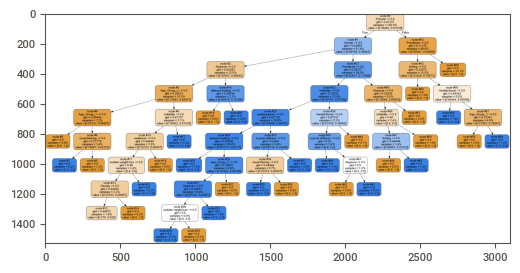

In [67]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
import cv2

export_graphviz(model_dt, 
                out_file='decision_tree.dot',
                feature_names= X_train.columns, 
                rounded=True, 
                precision=5, 
                node_ids=True, 
                proportion=True,
                filled=True)

(graph,) = pydot.graph_from_dot_file('decision_tree.dot')
graph.write_png('decision_tree.png')
Image = cv2.imread('decision_tree.png')
plt.imshow(Image)

In [68]:
y_pred_train_dt = model_dt.predict(X_train) 
y_pred_test_dt = model_dt.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_train_dt = accuracy_score(y_train,y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test,y_pred_test_dt)
print('Accuracy score for train data for DT is:', accuracy_train_dt)
print('Accuracy score for test data for DT is:', accuracy_test_dt)

Accuracy score for train data for DT is: 0.9927884615384616
Accuracy score for test data for DT is: 0.9711538461538461


In [70]:
from sklearn.metrics import confusion_matrix
c_matrix_train_dt = pd.DataFrame(confusion_matrix(y_train, y_pred_train_dt))
c_matrix_train_dt.index = ['Actual Negative(0)','Actual Positive(1)']
c_matrix_train_dt.columns = ['Predicted Negative(0)','Predicted Positive(1)']
print("Confusion Matrix for DT for Train set\n",c_matrix_train_dt)

Confusion Matrix for DT for Train set
                     Predicted Negative(0)  Predicted Positive(1)
Actual Negative(0)                    157                      3
Actual Positive(1)                      0                    256


In [71]:
from sklearn.metrics import confusion_matrix
c_matrix_test_dt = pd.DataFrame(confusion_matrix(y_test, y_pred_test_dt))
c_matrix_test_dt.index = ['Actual Negative(0)','Actual Positive(1)']
c_matrix_test_dt.columns = ['Predicted Negative(0)','Predicted Positive(1)']
print("Confusion Matrix for DT for Test set\n",c_matrix_test_dt)

Confusion Matrix for DT for Test set
                     Predicted Negative(0)  Predicted Positive(1)
Actual Negative(0)                     39                      1
Actual Positive(1)                      2                     62


### 8.2.2 Cross Validation for Decision Tree   <br id=section80202 ></br>

In [72]:
# cross_val_score
#https://stackoverflow.com/questions/35097003/cross-validation-decision-trees-in-sklearn
from sklearn.model_selection import cross_val_score
model_dt = tree.DecisionTreeClassifier(random_state=1)
scores = cross_val_score(model_dt, X_train, y_train.values.ravel(), cv=5)
print (scores)
print("mean dt_score for train set is {} with Std deviation of {}".format(np.mean(scores),np.std(scores)))

[0.95238095 0.86746988 0.91566265 0.93975904 0.93975904]
mean dt_score for train set is 0.9230063109581181 with Std deviation of 0.030207289602283482


In [73]:
 # cross validation using Repeated Stratified K Fold
from sklearn.model_selection import RepeatedStratifiedKFold
model_dt = tree.DecisionTreeClassifier(random_state=4)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model_dt, X_train, y_train.values.ravel(), cv=cv)
print (scores)
print("mean dt_score for train set is {} with Std deviation of {}".format(np.mean(scores),np.std(scores)))

[0.92857143 0.96385542 0.96385542 0.95180723 0.96385542 0.92857143
 0.93975904 0.97590361 0.93975904 0.87951807 0.92857143 0.95180723
 0.95180723 0.95180723 0.95180723]
mean dt_score for train set is 0.9447504302925988 with Std deviation of 0.022218436575703857


In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}

#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

In [75]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(model_dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 4,
 'splitter': 'best'}


Conclusion: Repeated Stratified K fold has a stable accuracy score, hence choosing this method for cross validations for all models.

### 8.2.3 Hypertuning Decision Tree using Random Search <br id=section80203 ></br>

In [76]:
model_dt1 = tree.DecisionTreeClassifier(random_state = 4)

In [77]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from

tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,10),'min_samples_leaf': range(2,10), 'min_samples_split': range(2,10),'max_features': ['sqrt', 'log2', None]}]

# run randomized search with K fold cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
random_search = RandomizedSearchCV(model_dt1,tree_para, cv=cv,refit='AUC')
random_search.fit(X_train, y_train)

Wall time: 1.13 s


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
                   estimator=DecisionTreeClassifier(random_state=4),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': range(2, 10),
                                         'max_features': ['sqrt', 'log2', None],
                                         'min_samples_leaf': range(2, 10),
                                         'min_samples_split': range(2, 10)}],
                   refit='AUC')

In [78]:
y_pred_train_dt1 = random_search.predict(X_train) 
y_pred_test_dt1 = random_search.predict(X_test)

In [79]:
accuracy_train_dt1 = accuracy_score(y_train,y_pred_train_dt1)
accuracy_test_dt1 = accuracy_score(y_test,y_pred_test_dt1)
print('Accuracy score for train data is:', accuracy_train_dt1)
print('Accuracy score for test data is:', accuracy_test_dt1)

Accuracy score for train data is: 0.9639423076923077
Accuracy score for test data is: 0.9519230769230769


In [80]:
random_search.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 5,
 'criterion': 'gini'}

In [81]:
print (classification_report(y_test,y_pred_test_dt1))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.98      0.94      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104



In [82]:
model_dt2 = tree.DecisionTreeClassifier(random_state = 4)

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from

tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,20),'min_samples_leaf': range(2,20), 'min_samples_split': range(2,20),'max_features': ['sqrt', 'log2', None]}]

# run randomized search with K fold cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
random_search2 = RandomizedSearchCV(model_dt2,tree_para, cv=cv,refit='AUC')
random_search2.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
                   estimator=DecisionTreeClassifier(random_state=4),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': range(2, 20),
                                         'max_features': ['sqrt', 'log2', None],
                                         'min_samples_leaf': range(2, 20),
                                         'min_samples_split': range(2, 20)}],
                   refit='AUC')

In [84]:
y_pred_train_dt2 = random_search2.predict(X_train) 
y_pred_test_dt2 = random_search2.predict(X_test)

In [85]:
accuracy_train_dt2 = accuracy_score(y_train,y_pred_train_dt2)
accuracy_test_dt2 = accuracy_score(y_test,y_pred_test_dt2)
print('Accuracy score for train data is:', accuracy_train_dt2)
print('Accuracy score for test data is:', accuracy_test_dt2)

Accuracy score for train data is: 0.9567307692307693
Accuracy score for test data is: 0.9423076923076923


In [86]:
random_search2.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 17,
 'criterion': 'entropy'}

### 8.2.4 Hypertuning using GridSearch  <br id=section80204 ></br>

Using best Random Searach parameters to set up Grid Search 
(min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 7,
 'criterion': 'gini'}

In [87]:
%%time
model_dt3 = tree.DecisionTreeClassifier(random_state = 4)
from sklearn.model_selection import GridSearchCV

tree_para = [{'criterion':['gini','entropy'],'max_depth':(5,6,7,8),'min_samples_leaf':(2,3,4),'min_samples_split':(3,4,5),
                             'max_features': [None] }]
                            
# run grid search with K fold cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(model_dt3,tree_para, cv=cv, refit='AUC')
grid_search.fit(X_train, y_train)

Wall time: 8.2 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=DecisionTreeClassifier(random_state=4),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': (5, 6, 7, 8), 'max_features': [None],
                          'min_samples_leaf': (2, 3, 4),
                          'min_samples_split': (3, 4, 5)}],
             refit='AUC')

In [88]:
y_pred_train_dt3 = grid_search.predict(X_train) 
y_pred_test_dt3 = grid_search.predict(X_test)

In [89]:
accuracy_train_dt3 = accuracy_score(y_train,y_pred_train_dt3)
accuracy_test_dt3 = accuracy_score(y_test,y_pred_test_dt3)
print('Accuracy score for train data is:', accuracy_train_dt3)
print('Accuracy score for test data is:', accuracy_test_dt3)

Accuracy score for train data is: 0.9639423076923077
Accuracy score for test data is: 0.9519230769230769


In [90]:
print (classification_report(y_test,y_pred_test_dt3))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.98      0.94      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104



In [91]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

### 8.2.5  Feature Selection based on the best DT model <br id=section80205 ></br>

In [92]:
#from sklearn import feature_selection
cat_cols=X_train.columns

In [93]:
model_dt4 = tree.DecisionTreeClassifier(random_state = 4,criterion='entropy',
 max_depth= 5,
 max_features= None,
 min_samples_leaf= 2,
 min_samples_split= 5)


In [94]:
model_dt4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, random_state=4)

In [95]:
y_pred_train_dt4 = model_dt4.predict(X_train) 
y_pred_test_dt4 = model_dt4.predict(X_test)

In [96]:
accuracy_train_dt4 = accuracy_score(y_train,y_pred_train_dt4)
accuracy_test_dt4 = accuracy_score(y_test,y_pred_test_dt4)
print('Accuracy score for train data is:', accuracy_train_dt4)
print('Accuracy score for test data is:', accuracy_test_dt4)

Accuracy score for train data is: 0.9639423076923077
Accuracy score for test data is: 0.9519230769230769


In [97]:
print (classification_report(y_test,y_pred_test_dt4))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.98      0.94      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104



In [98]:
print(model_dt4.feature_importances_)

[0.12656305 0.1583394  0.43638691 0.         0.00671615 0.
 0.05280797 0.         0.04482487 0.03938192 0.         0.
 0.01293164 0.06133105 0.         0.         0.01602575 0.04155241
 0.00313888 0.        ]


Feature: 0, Score: 0.12656
Feature: 1, Score: 0.15834
Feature: 2, Score: 0.43639
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00672
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.05281
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.04482
Feature: 9, Score: 0.03938
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.01293
Feature: 13, Score: 0.06133
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.01603
Feature: 17, Score: 0.04155
Feature: 18, Score: 0.00314
Feature: 19, Score: 0.00000


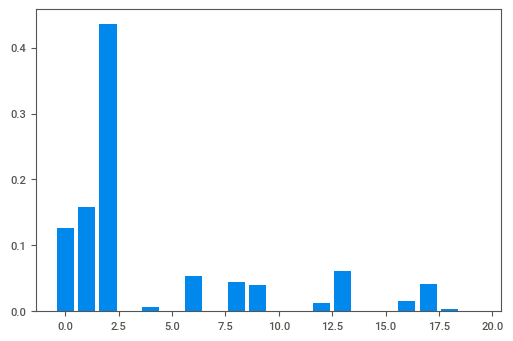

In [99]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/ 
#http://machinelearningandspark.blogspot.com/2016/06/feature-selection-in-decision-tree.html 
# get importance
importance = model_dt4.feature_importances_
from matplotlib import pyplot
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [100]:
for feature in zip(cat_cols, model_dt4.feature_importances_):
    print(feature)

('Gender', 0.12656305279053162)
('Polyuria', 0.15833939937474767)
('Polydipsia', 0.43638690887685766)
('sudden weight loss', 0.0)
('weakness', 0.006716149264222306)
('Polyphagia', 0.0)
('Genital thrush', 0.05280796751454143)
('visual blurring', 0.0)
('Itching', 0.0448248699366473)
('Irritability', 0.0393819163710637)
('delayed healing', 0.0)
('partial paresis', 0.0)
('muscle stiffness', 0.012931637772525715)
('Alopecia', 0.061331052048312004)
('Obesity', 0.0)
('Age_Group_1', 0.0)
('Age_Group_2', 0.016025750747983507)
('Age_Group_3', 0.04155241151352205)
('Age_Group_4', 0.00313888378904512)
('Age_Group_5', 0.0)


In [101]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.05
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(model_dt4, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(criterion='entropy',
                                                 max_depth=5,
                                                 min_samples_leaf=2,
                                                 min_samples_split=5,
                                                 random_state=4),
                threshold=0.03)

In [102]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(cat_cols[feature_list_index])

Gender
Polyuria
Polydipsia
Genital thrush
Itching
Irritability
Alopecia
Age_Group_3


Conclusion: Based on Decision Tree, out of 15 only 8 features seems important : Gender, Polyuria,Polydipsia, Genital thrush, Itching, Irritability, Alopecia, Age_Group_3

### 8.2.6 Using SFM transform to create new dataset for DT <br id=section80206 ></br>

In [103]:
#https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

### 8.2.7 Running tuned DT on selected features <br id=section80207 ></br>

In [104]:
model_dt5 = tree.DecisionTreeClassifier(random_state = 42)

In [105]:
%%time
model_dt5.fit(X_important_train, y_train)

Wall time: 3 ms


DecisionTreeClassifier(random_state=42)

In [106]:
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model_dt5, X_important_train, y_train.values.ravel(), cv=cv)
print (scores)
print("mean dt_score is {}".format(np.mean(scores)))

[0.98809524 0.98795181 0.98795181 0.95180723 0.96385542 0.91666667
 0.96385542 1.         0.93975904 0.97590361 0.98809524 0.95180723
 0.96385542 0.97590361 0.97590361]
mean dt_score is 0.968760757314974


In [107]:
y_pred_train_dt6 = model_dt5.predict(X_important_train) 
y_pred_test_dt6 = model_dt5.predict(X_important_test)

In [108]:
accuracy_train_dt6 = accuracy_score(y_train,y_pred_train_dt6)
accuracy_test_dt6 = accuracy_score(y_test,y_pred_test_dt6)
print('Accuracy score for train data is:', accuracy_train_dt6)
print('Accuracy score for test data is:', accuracy_test_dt6)

Accuracy score for train data is: 0.9831730769230769
Accuracy score for test data is: 0.9711538461538461


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_dt6))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



In [110]:
#from pprint import pprint
#print('Parameters currently in use:\n')
#pprint(model_dt6.get_params())

### 8.3   Evaluating and improving Random Forest

Resources used for Codes
#https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
#https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
#https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [111]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 4)
model_rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=4)

### 8.3.1 Using RepeatedStratifiedKfold method for cross validation for Random Forest <br id=section80301></br>

In [112]:
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores_rf2 = cross_val_score(model_rf, X_train, y_train.values.ravel(), cv=cv)
print (scores_rf2)
print("mean rf_cv_score for train set is {} with Std deviation of {}".format(np.mean(scores_rf2),np.std(scores_rf2)))

[0.98809524 0.96385542 0.97590361 0.95180723 0.96385542 0.95238095
 0.93975904 1.         0.97590361 0.96385542 0.96428571 0.97590361
 0.95180723 0.97590361 0.96385542]
mean rf_cv_score for train set is 0.9671447695544079 with Std deviation of 0.014866383079743771


In [113]:
from pprint import pprint

In [114]:
print('Parameters currently in use:\n')
pprint(model_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}


### 8.3.2 Using Random Search for hypertuning Random Forest <br id=section80302 ></br>

In [115]:
model_rf1 = RandomForestClassifier(random_state = 4)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,10),
              "min_samples_split": sp_randint(2, 10),
              "min_samples_leaf": sp_randint(2, 10),
              "bootstrap": [True, False],
              "n_estimators": [10,50,100, 200, 400],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# run randomized search
n_iter_search = 50
random_search_rf = RandomizedSearchCV(model_rf1, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1, cv=cv)

In [116]:
%%time
random_search_rf.fit(X_train, y_train.values.ravel())

Wall time: 1min 49s


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
                   estimator=RandomForestClassifier(random_state=4), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 10),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024D74D8AD88>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024D74E69BC8>,
                                        'n_estimators': [10, 50, 100, 200,
                                                         400]})

In [117]:
random_search_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 400}

In [118]:
y_pred_train_rf = random_search_rf.predict(X_train)
y_pred_test_rf = random_search_rf.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data using the model with parameter specification:', accuracy_score(y_train,y_pred_train_rf))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test_rf))

Accuracy score for train data using the model with parameter specification: 0.9759615384615384
Accuracy score for test data using the model with parameter specification: 0.9423076923076923


### 8.3.3  Hypertuning Random Forest with Grid Search <br id=section80303 ></br>

In [120]:
model_rf2 = RandomForestClassifier(random_state = 4)

In [121]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 

param_dist = {"max_depth":(7,8,9,10),
              "min_samples_split": (2,4,6,8),
              "min_samples_leaf": (2,3,4,5),
              "bootstrap": [False],
              "n_estimators": [50,70,100,200],
              "criterion" : ["gini"],
              'max_features': ['sqrt']
             }
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search_rf = GridSearchCV(model_rf2,param_dist,cv=cv)

In [122]:
%%time
grid_search_rf.fit(X_train, y_train.values.ravel())

Wall time: 8min 43s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=RandomForestClassifier(random_state=4),
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': (7, 8, 9, 10), 'max_features': ['sqrt'],
                         'min_samples_leaf': (2, 3, 4, 5),
                         'min_samples_split': (2, 4, 6, 8),
                         'n_estimators': [50, 70, 100, 200]})

In [123]:
y_pred_train_rf1 = grid_search_rf.predict(X_train)
y_pred_test_rf1 = grid_search_rf.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data using the model without parameter specification:', accuracy_score(y_train,y_pred_train_rf1))
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test_rf1))

Accuracy score for train data using the model without parameter specification: 0.9879807692307693
Accuracy score for test data using the model without parameter specification: 0.9711538461538461


In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_rf1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



In [126]:
grid_search_rf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 70}

Conclusions:
GridSearch is computationally very expensive and is giving the same score as the base model. However, between the 2 models whhc will perform better, can only be confirmed when the model is deployed. 

### 8.3.4 Feature Selection based on best Random Forest Model  <br id=section80304 ></br>

In [127]:
model_rf3 = RandomForestClassifier(random_state = 4,
                                n_estimators = 100,
                                min_samples_split = 4,
                                min_samples_leaf = 2,
                                  max_depth=9,
                                  bootstrap=False,
                                   max_features= 'sqrt',
                                  criterion='gini')

In [128]:
model_rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=False, max_depth=9, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=4, random_state=4)

In [129]:
print('Parameters currently in use:\n')
pprint(model_rf3.get_params())

Parameters currently in use:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}


In [130]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [131]:
y_pred_train_rf3 = model_rf3.predict(X_train)
y_pred_test_rf3 = model_rf3.predict(X_test)

In [132]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data using the model with parameter specification:', accuracy_score(y_train,y_pred_train_rf3))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test_rf3))

Accuracy score for train data using the model with parameter specification: 0.9879807692307693
Accuracy score for test data using the model with parameter specification: 0.9807692307692307


In [133]:
print(classification_report(y_test,y_pred_test_rf3))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [134]:
print(model_rf3.feature_importances_)

[0.11068446 0.22852863 0.2090247  0.04297093 0.01970704 0.03401916
 0.02056402 0.02771669 0.0268911  0.03955668 0.02902658 0.0698443
 0.02694448 0.04135857 0.01594587 0.00760473 0.01484473 0.01489032
 0.01204777 0.00782922]


In [135]:
for feature in zip(cat_cols, model_rf3.feature_importances_):
    print(feature)

('Gender', 0.11068445708942688)
('Polyuria', 0.22852863258458242)
('Polydipsia', 0.20902470147557664)
('sudden weight loss', 0.042970934498683465)
('weakness', 0.019707041024860778)
('Polyphagia', 0.03401916325751855)
('Genital thrush', 0.02056401845541992)
('visual blurring', 0.027716692838879217)
('Itching', 0.026891104667767056)
('Irritability', 0.03955668006086208)
('delayed healing', 0.02902657675031881)
('partial paresis', 0.06984429638000288)
('muscle stiffness', 0.02694448116017152)
('Alopecia', 0.04135857419972098)
('Obesity', 0.015945868929150477)
('Age_Group_1', 0.00760473065943055)
('Age_Group_2', 0.01484473365961253)
('Age_Group_3', 0.014890323378978802)
('Age_Group_4', 0.012047766977283167)
('Age_Group_5', 0.007829221951753399)


Feature: 0, Score: 0.11068
Feature: 1, Score: 0.22853
Feature: 2, Score: 0.20902
Feature: 3, Score: 0.04297
Feature: 4, Score: 0.01971
Feature: 5, Score: 0.03402
Feature: 6, Score: 0.02056
Feature: 7, Score: 0.02772
Feature: 8, Score: 0.02689
Feature: 9, Score: 0.03956
Feature: 10, Score: 0.02903
Feature: 11, Score: 0.06984
Feature: 12, Score: 0.02694
Feature: 13, Score: 0.04136
Feature: 14, Score: 0.01595
Feature: 15, Score: 0.00760
Feature: 16, Score: 0.01484
Feature: 17, Score: 0.01489
Feature: 18, Score: 0.01205
Feature: 19, Score: 0.00783


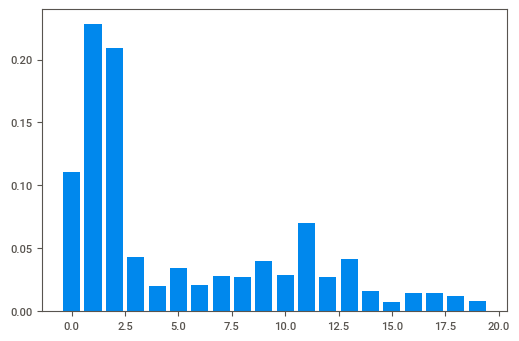

In [136]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/ 
#http://machinelearningandspark.blogspot.com/2016/06/feature-selection-in-decision-tree.html 
# get importance
importance = model_rf3.feature_importances_
from matplotlib import pyplot
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [137]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.05
from sklearn.feature_selection import SelectFromModel
sfm2 = SelectFromModel(model_rf3, threshold=0.03)

# Train the selector
sfm2.fit(X_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(bootstrap=False, max_depth=9,
                                                 max_features='sqrt',
                                                 min_samples_leaf=2,
                                                 min_samples_split=4,
                                                 random_state=4),
                threshold=0.03)

In [138]:
# Print the names of the most important features
for feature_list_index in sfm2.get_support(indices=True):
    print(cat_cols[feature_list_index])

Gender
Polyuria
Polydipsia
sudden weight loss
Polyphagia
Irritability
partial paresis
Alopecia


In [139]:
# Classification reports instead of accuracy for all 
#Try new featurew with 0.05 and 0.03
# Check for new features based on DT
# Try PCA and kernel PCA 


### 8.3.5  Using SFM to create new dataset with important features based on the best Random Forest Model <br id=section80305 ></br>

In [140]:
#https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
X_important_train2 = sfm2.transform(X_train)
X_important_test2 = sfm2.transform(X_test)

### 8.3.6 Running tuned RF model on selected features  <br id=section80306 ></br>

In [141]:
model_rf4 = RandomForestClassifier(random_state = 4,
                                n_estimators = 100,
                                min_samples_split = 4,
                                min_samples_leaf = 2,
                                  max_depth=9,
                                  bootstrap=False,
                                   max_features= 'sqrt',
                                  criterion='gini')

In [142]:
model_rf4.fit(X_important_train2, y_train.values.ravel())

RandomForestClassifier(bootstrap=False, max_depth=9, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=4, random_state=4)

In [143]:
y_pred_train_rf4 = model_rf4.predict(X_important_train2)
y_pred_test_rf4 = model_rf4.predict(X_important_test2)

In [144]:
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(model_rf4, X_important_train2, y_train.values.ravel(), cv=cv)
print (scores)
print("mean dt_score is {}".format(np.mean(scores)))

[0.96428571 0.95180723 0.93975904 0.91566265 0.91566265 0.91666667
 0.89156627 0.97590361 0.95180723 0.95180723 0.97619048 0.93975904
 0.92771084 0.93975904 0.91566265]
mean dt_score is 0.9382673551348248


In [145]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data using the model without parameter specification:', accuracy_score(y_train,y_pred_train_rf4))
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test_rf4))

Accuracy score for train data using the model without parameter specification: 0.9543269230769231
Accuracy score for test data using the model without parameter specification: 0.9326923076923077


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_rf4))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92        40
           1       0.97      0.92      0.94        64

    accuracy                           0.93       104
   macro avg       0.93      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



In [147]:
print('Parameters currently in use:\n')
pprint(model_rf4.get_params())

Parameters currently in use:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}


### 8.3.7 Tuning RF model for selected features  <br id=section80307 ></br>

In [148]:
model_rf5 = RandomForestClassifier(random_state = 4)
param_dist = {"max_depth":(7,8,9,10),
              "min_samples_split": (4,6,8,10),
              "min_samples_leaf": (2,3,4),
              "bootstrap": [False],
              "n_estimators": [20,50,70,100],
              "criterion" : ["gini"],
              'max_features': ['sqrt','log2',None]
             }
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search_rf5 = GridSearchCV(model_rf5,param_dist,cv=cv)

In [149]:
%%time
grid_search_rf5.fit(X_important_train2, y_train.values.ravel())

Wall time: 11min 1s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=RandomForestClassifier(random_state=4),
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': (7, 8, 9, 10),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': (2, 3, 4),
                         'min_samples_split': (4, 6, 8, 10),
                         'n_estimators': [20, 50, 70, 100]})

In [150]:
y_pred_train_rf5 = grid_search_rf5.predict(X_important_train2)
y_pred_test_rf5 = grid_search_rf5.predict(X_important_test2)

In [151]:
print(classification_report(y_test, y_pred_test_rf5))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92        40
           1       0.97      0.92      0.94        64

    accuracy                           0.93       104
   macro avg       0.93      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



In [152]:
grid_search_rf5.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 70}

In [153]:
%%time
model_dt7 = tree.DecisionTreeClassifier(random_state = 4)
from sklearn.model_selection import GridSearchCV

tree_para = [{'criterion':['gini','entropy'],'max_depth':(6,7,8,9),'min_samples_leaf':(2,3,4),'min_samples_split':(3,4,5,6),
                             'max_features': ['sqrt','log2',None] }]
                            
# run grid search with K fold cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search_dt7 = GridSearchCV(model_dt7,tree_para, cv=cv, refit='AUC')
grid_search_dt7.fit(X_important_train2, y_train)

Wall time: 14.4 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=DecisionTreeClassifier(random_state=4),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': (6, 7, 8, 9),
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_leaf': (2, 3, 4),
                          'min_samples_split': (3, 4, 5, 6)}],
             refit='AUC')

In [154]:
y_pred_train_dt7 = grid_search_dt7.predict(X_important_train2)
y_pred_test_dt7 = grid_search_dt7.predict(X_important_test2)

In [155]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data using the model without Grid search:', accuracy_score(y_train,y_pred_train_dt7))
print('Accuracy score for test data using the model without Grid search:', accuracy_score(y_test,y_pred_test_dt7))

Accuracy score for train data using the model without Grid search: 0.9495192307692307
Accuracy score for test data using the model without Grid search: 0.9230769230769231


In [156]:
print(classification_report(y_test, y_pred_test_dt7))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        40
           1       0.97      0.91      0.94        64

    accuracy                           0.92       104
   macro avg       0.92      0.93      0.92       104
weighted avg       0.93      0.92      0.92       104



In [157]:
grid_search_dt7.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 3}

### 8.4. Adding important features from the best DT and RF models <br id=section804 ></br>

In [158]:
#Adding three more important features from RF model

imp_cols_merge = ['Gender','Polyuria','Polydipsia','Genital thrush','Alopecia', "Itching","Irritability", "Age_Group_3",
'sudden weight loss','Polyphagia','partial paresis']

In [159]:
X_train_merged=X_train[imp_cols_merge]
X_test_merged=X_test[imp_cols_merge]

### 8.4.1 Running Base Models on new dataset containing selected features from the best DT and RF models  <br id=section80401></br>

In [160]:
print ("This is base model experiementation to decide benchmark models")
for eachModel in models:
  model = eachModel
  start_time = time.time()
  model.fit(X_train_merged, y_train.values.ravel())
  pred = model.predict(X_test_merged)
  current_time=time.time()  
  elapsed_time = (current_time - start_time)
  x = round(elapsed_time,3)
  accuracy = accuracy_score(pred,y_test)
  F1 = f1_score(pred,y_test)
  accuracy = round(accuracy,3)
  F1 = round(F1,3)
  print ("Test Accuracy for {} is {}, F1 score is {}".format(model,accuracy,F1),"Time taken is {} seconds".format(x))

This is base model experiementation to decide benchmark models
Test Accuracy for LogisticRegression(max_iter=1000) is 0.933, F1 score is 0.945 Time taken is 0.011 seconds
Test Accuracy for DecisionTreeClassifier() is 0.933, F1 score is 0.946 Time taken is 0.004 seconds
Test Accuracy for RandomForestClassifier() is 0.933, F1 score is 0.946 Time taken is 0.189 seconds
Test Accuracy for KNeighborsClassifier() is 0.923, F1 score is 0.935 Time taken is 0.008 seconds
Test Accuracy for GaussianNB() is 0.885, F1 score is 0.909 Time taken is 0.004 seconds
Test Accuracy for SVC(C=0.8, gamma='auto') is 0.923, F1 score is 0.938 Time taken is 0.006 seconds
Test Accuracy for SVC(C=0.8, gamma='auto', kernel='linear') is 0.923, F1 score is 0.937 Time taken is 0.005 seconds
Test Accuracy for SVC(C=0.8, gamma='auto', kernel='poly') is 0.904, F1 score is 0.918 Time taken is 0.006 seconds


### 8.4.2 Refining Logistic Regression with Grid Search for new dataset wth selected features from the best DT and RF models <br id= section80402></br>

In [161]:
%%time
# define models and parameters
lr1 = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search_lr1 = GridSearchCV(estimator=lr1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search_lr1.fit(X_train_merged, y_train.values.ravel())

Wall time: 3.24 s


In [162]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

Best: 0.914257 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.911035 (0.032521) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.911035 (0.032521) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.911035 (0.032521) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.914257 (0.032166) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.914257 (0.032166) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.914257 (0.032166) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.909466 (0.033631) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.909466 (0.033631) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.909466 (0.033631) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.890256 (0.034039) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.890256 (0.034039) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.894234 (0.034497) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.834060 (0.047910) with

In [163]:
y_pred_train_lr1 = grid_search_lr1.predict(X_train_merged)
y_pred_test_lr1 = grid_search_lr1.predict(X_test_merged)

In [164]:
print('Accuracy score for train data using the model with Grid search:', accuracy_score(y_train,y_pred_train_lr1))
print('Accuracy score for test data using the model with Grid search:', accuracy_score(y_test,y_pred_test_lr1))

Accuracy score for train data using the model with Grid search: 0.9326923076923077
Accuracy score for test data using the model with Grid search: 0.9326923076923077


In [165]:
print(classification_report(y_test, y_pred_test_lr1))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.95      0.94      0.94        64

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104



In [166]:
print(f1_score(y_test,y_pred_test_lr1))

0.9448818897637795


### 8.4.3 Refinining Decision Tree with Random Search using the new dataset with selected features from the best DT and RF models <br id=section80403 ></br>

In [167]:
%%time
model_dt8=tree.DecisionTreeClassifier(random_state = 4)
tree_para = [{'criterion':['gini'],'max_depth': range(2,8),'min_samples_leaf': range(2,8), 'min_samples_split': range(2,8),'max_features': ['sqrt', 'log2',None]}]

# run randomized search with K fold cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
random_search_dt8 = RandomizedSearchCV(model_dt8,tree_para, cv=cv,refit='AUC')
random_search_dt8.fit(X_train_merged, y_train)

Wall time: 1.05 s


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
                   estimator=DecisionTreeClassifier(random_state=4),
                   param_distributions=[{'criterion': ['gini'],
                                         'max_depth': range(2, 8),
                                         'max_features': ['sqrt', 'log2', None],
                                         'min_samples_leaf': range(2, 8),
                                         'min_samples_split': range(2, 8)}],
                   refit='AUC')

In [168]:
y_pred_train_dt8 = random_search_dt8.predict(X_train_merged) 
y_pred_test_dt8 = random_search_dt8.predict(X_test_merged)

In [169]:
print('Accuracy score for train data using the model without Grid search:', accuracy_score(y_train,y_pred_train_dt8))
print('Accuracy score for test data using the model without Grid search:', accuracy_score(y_test,y_pred_test_dt8))

Accuracy score for train data using the model without Grid search: 0.9375
Accuracy score for test data using the model without Grid search: 0.9038461538461539


In [170]:
print(classification_report(y_test, y_pred_test_dt8))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        40
           1       0.94      0.91      0.92        64

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104



In [171]:
random_search_dt8.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 6,
 'max_features': None,
 'max_depth': 7,
 'criterion': 'gini'}

### 8.4.4 Refinining Decision Tree with Grid Search using the new dataset with selected features from the best DT and RF models <br id=section80404 ></br>

In [172]:
%%time
model_dt9 = tree.DecisionTreeClassifier(random_state = 4)
from sklearn.model_selection import GridSearchCV

tree_para = [{'criterion':['gini','entropy'],'max_depth':(4,5,6),'min_samples_leaf':(2,3,4),'min_samples_split':(2,3,4),
                            'max_features': [None] }]
                            
# run grid search with K fold cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search_dt9 = GridSearchCV(model_dt9,tree_para, cv=cv, refit='AUC')
grid_search_dt9.fit(X_train_merged, y_train)

Wall time: 5.72 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=DecisionTreeClassifier(random_state=4),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': (4, 5, 6), 'max_features': [None],
                          'min_samples_leaf': (2, 3, 4),
                          'min_samples_split': (2, 3, 4)}],
             refit='AUC')

In [173]:
y_pred_train_dt9 = grid_search_dt9.predict(X_train_merged)
y_pred_test_dt9 = grid_search_dt9.predict(X_test_merged)

In [174]:
print('Accuracy score for train data using the model without Grid search:', accuracy_score(y_train,y_pred_train_dt9))
print('Accuracy score for test data using the model without Grid search:', accuracy_score(y_test,y_pred_test_dt9))

Accuracy score for train data using the model without Grid search: 0.9591346153846154
Accuracy score for test data using the model without Grid search: 0.9326923076923077


In [175]:
print(f1_score(y_test,y_pred_test_dt9))

0.943089430894309


In [176]:
print(classification_report(y_test, y_pred_test_dt9))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.98      0.91      0.94        64

    accuracy                           0.93       104
   macro avg       0.92      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



In [177]:
grid_search_dt9.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

### 8.4.5 Hypertuning Random Forest with Random Search using the new dataset with selected features from the best DT and RF models <br id=section80405 ></br>

In [178]:
model_rf10 = RandomForestClassifier(random_state = 4)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,8),
              "min_samples_split": sp_randint(2,8),
              "min_samples_leaf": sp_randint(2,8),
              "bootstrap": [True, False],
              "n_estimators": [10,20,50,100, 200],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# run randomized search
n_iter_search = 50
random_search_rf2 = RandomizedSearchCV(model_rf10, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1, cv=cv)

In [179]:
%%time
random_search_rf2.fit(X_train_merged, y_train.values.ravel())

Wall time: 47.8 s


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
                   estimator=RandomForestClassifier(random_state=4), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 8),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024D75050A88>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024D75050408>,
                                        'n_estimators': [10, 20, 50, 100, 200]})

In [180]:
y_pred_train_rf10 = random_search_rf2.predict(X_train_merged)
y_pred_test_rf10 = random_search_rf2.predict(X_test_merged)

In [181]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data using the model without parameter specification:', accuracy_score(y_train,y_pred_train_rf10))
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test_rf10))

Accuracy score for train data using the model without parameter specification: 0.9639423076923077
Accuracy score for test data using the model without parameter specification: 0.9423076923076923


In [182]:
print(classification_report(y_test, y_pred_test_rf10))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



In [183]:
random_search_rf2.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 50}

### 8.4.6 Hypertuning Random Forest with Grid Search using the new dataset with selected features from the best DT and RF models <br id=section80406 ></br>

In [184]:
model_rf11 = RandomForestClassifier(random_state = 4)

In [185]:
param_dist = {"max_depth":(4,6,8),
              "min_samples_split": (2,3,4),
              "min_samples_leaf": (2,3,4),
              "bootstrap": [False],
              "n_estimators": [40,50,60,80],
              "criterion" : ["gini","entropy"],
              'max_features': ['sqrt']
             }
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search_rf2 = GridSearchCV(model_rf11,param_dist,cv=cv)

In [188]:
%%time
grid_search_rf2.fit(X_train, y_train.values.ravel())

Wall time: 4min 28s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=RandomForestClassifier(random_state=4),
             param_grid={'bootstrap': [False], 'criterion': ['gini', 'entropy'],
                         'max_depth': (4, 6, 8), 'max_features': ['sqrt'],
                         'min_samples_leaf': (2, 3, 4),
                         'min_samples_split': (2, 3, 4),
                         'n_estimators': [40, 50, 60, 80]})

In [189]:
y_pred_train_rf11 = grid_search_rf2.predict(X_train)
y_pred_test_rf11 = grid_search_rf2.predict(X_test)

In [190]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data using the model without parameter specification:', accuracy_score(y_train,y_pred_train_rf11))
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test_rf11))

Accuracy score for train data using the model without parameter specification: 0.9879807692307693
Accuracy score for test data using the model without parameter specification: 0.9711538461538461


In [191]:
print(f1_score(y_test,y_pred_test_rf11))

0.9763779527559054


In [192]:
print(classification_report(y_test, y_pred_test_rf11))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



In [193]:
grid_search_rf2.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

## 9. Summary of Results <br id=section9 ></br>

1. DT and RF performed better than other base models:
    - DT gave a 97% accuracy which reduced to 94.4% on using Repeated Stratified K fold cross validation
    - RF gave an accuracy of 97-99% in different runs which reduced to 96.7% on cross validation

2. RF with hyperparameter tuning improved its accuracy score slightly to 97%  but was computationally expensive taking 9 to11 
   minutes (Grid Search CV) to run. Base model although gave slightly less accuracy of 96.7% but took only 2 sec to run.
  
3. Important features were selected based on the best DT and RF models,  using a threshold of 0.03 for feature importance 
   parameter
    - 8 features each from DT and RF were shortlisted, out of which 5 were common in both
    - A new dataset was created by combining the important features from both RF and DT 
        -The new dataset had 12 features instead of 17

4.  Using  the selected features, DT was able to improve its accuracy from 95% to 96.8 %  and took only 3 ms to run
    - Accuracy for RF reduced to 93.8% with selected features
    
5.  Using the new dataset  which was created by merging selected features from both DT and RF,  RF  performed the best giving 
    97% accuracy score, though was computationally very expensive taking over 4 minutes to execute (Grid Search CV)


## 10. Conclusions <br id=section10 ></br>

1. DT was the best model with an accuracy score of 96.8 % (with 8 selected features) and a time of 3 ms
     
2. RF base model with Repeated Stratified K fold validation was the second best model in terms of accuracy (96.7%) and the time 
   taken (2 secs respectively)
    - Hyperparameter tuning did not add much value for RF in terms of accuracy and was computationally very expensive
     
3. Selecting the features, did not help in improving the accuracy score beyond 97% for RF  but the selection helped in 
   improving the accuracy of DT from 95% to 96.8%
    
3. Surprisingly, neither RF  nor DT showed “delayed healing” as one of the important features, where as clinically “delayed    
   healing” is a known symptom of early stage diabetes – reason for this discrepancy is not clear at this time

4. There are several other things that can be tried to improve the predictions such as 
    - PCA
    - Boosting /Stacking
    - Combining features like Polyuria and Polydipsia , which seem to be slightly correlated (correlation coefficient of ~0.6)
    - 90% females are disease positive and the correlation co-efficient between class and gender is 0.45.  Fixing this 
      imbalance in the female population could potentially further improve the accuracy of the model
